# 4: Continuous random variables


 #### [Back to main page](https://petrosyan.page/fall2020math3215)


**Definition (cdf)**

<div class="alert alert-block alert-info">

Let $X$ be any random variable (does not have to be discrete). Define the cdf of $X$ as before

$$F(x)=P(X\leq x).$$

</div>    
  
  
**Definition (Continuous random variable)**

<div class="alert alert-block alert-info">
    
A function $F:\mathbb{R}\to [0,1]$ is a cdf of some random variable,  if and only if

1. $F$ is non-decreasing:
$x\leq y\Rightarrow F(x)\leq F(y)$

2. $\lim\limits_{x\to -\infty}F(x)=0$

3. $\lim\limits_{x\to \infty}F(x)=1$

4. $F$ is  right continuous: for any $x\in \mathbb{R}$, $\lim\limits_{y\to x^+}f(y)=f(x).$
    
</div>    

An example of a pdf is given by 

$$f(x)=\frac{1}{\pi}\frac{\sin^2x}{ x^2}, \quad x\in\mathbb{R}.$$

This is indeed a pdf, because it is non-negative and, as it can be checked,  

$$\int\limits_\mathbb{R}\frac{\sin^2x}{ x^2}=\pi.$$

Below we plot the pdf of this distribution.



In [147]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider

x=0.5
def cdf_pdf(x):
    xdata = np.delete(np.linspace(-10, 10, 1000), [0])
    def pdf_func(x):
        y = np.divide(np.sin(x)**2,x**2)/np.pi
        return y


    plt.plot(xdata, pdf_func(xdata))
    xshade = xdata[xdata<=x]
    plt.fill_between(xshade, pdf_func(xshade), alpha=0.3)
    plt.scatter(x,0, s=30)
    plt.rcParams['figure.figsize'] = (8, 4)
    plt.axhline(y=0, color='k', linewidth=0.5)
    plt.xlim(-11,11)
    plt.ylim(0, 0.4)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks([x],["x={}".format(x)])
    plt.figtext(0.6,0.6, r"$f(x)=\frac{\sin^2x}{ \pi x^2}$", ha="left", va="top",
            backgroundcolor=(0, 0, 0, 0), fontsize="large")
    plt.show();

# create interactive variables
x = FloatSlider(min=-10.0, max=10.0, step=0.1, value=0.6, readout_format='')

# display the interactive plot
interact(cdf_pdf, x=x);

interactive(children=(FloatSlider(value=0.6, description='x', max=10.0, min=-10.0, readout_format=''), Output(…

### Logistic function

$$F(X)=\frac{e^x}{1+e^x}\quad \Rightarrow \quad  f(x)=\frac{e^x}{(1+e^x)^2}.$$


In [162]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider
plt.rcParams['figure.figsize'] = (16, 5)


def logistic_cdf_pdf(x):
    xdata = np.linspace(-10, 10, 1000)
    def cdf_func(xdata):
        val = np.divide(np.exp(xdata), 1+np.exp(xdata))
        return val
    def pdf_func(xdata):
        val = np.divide(np.exp(xdata), (1+np.exp(xdata)**2))
        return val
    
    fig, [ax1, ax2] = plt.subplots(1, 2)
    
    ax1.plot(xdata, pdf_func(xdata))
    xshade = xdata[xdata<=x]
    ax1.fill_between(xshade, pdf_func(xshade), alpha=0.3)
    ax1.scatter(x,0, s=30)
    ax1.set_xlim(-10, 10)
    ax1.set_ylim(0, 0.6) 
    ax1.spines["top"].set_visible(False)  
    ax1.spines["right"].set_visible(False)    
    ax1.set_xticks([x])
    ax1.set_xticklabels(["x={}".format(x)])
    ax1.set_title("pdf")
    
    ax2.plot(xdata, cdf_func(xdata))
    ax2.vlines(x, 0, cdf_func(x), linestyle="dashed", alpha=0.4)
    ax2.scatter(x,0, s=30)
    ax2.set_xlim(-10, 10)
    ax2.set_ylim(0, 1) 
    ax2.spines["top"].set_visible(False)  
    ax2.spines["right"].set_visible(False)    
    ax2.set_xticks([x])
    ax2.set_xticklabels(["x={}".format(x)])
    ax2.set_title("cdf")
    
    plt.show();
    
# create interactive variables
x = FloatSlider(min=-10, max=10, step=0.1, value=0.6, readout_format='')

# display the interactive plot
interact(logistic_cdf_pdf, x=x);    
        
        


interactive(children=(FloatSlider(value=0.6, description='x', max=10.0, min=-10.0, readout_format=''), Output(…

In [166]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider
plt.rcParams['figure.figsize'] = (16, 5)

a=0
b=1

def uniform_cdf_pdf(x, a=a, b=b):
    xdata = np.linspace(a-1, b+1, 1000)
    def cdf_func(xdata):
        f0 = lambda y: (y-a)/(b-a)
        val = np.piecewise(xdata, [xdata<a, (xdata>=a) & (xdata<=b), xdata>b], [0, f0, 1])
        return val
    def pdf_func(y):
        val = np.piecewise(y, [y<a, (y>=a) & (y<=b), y>b], [0, 1, 0])
        return val
    
    fig, [ax2, ax1] = plt.subplots(1, 2)
    
    ax1.plot(xdata, pdf_func(xdata))
    xshade = xdata[xdata<=x]
    ax1.fill_between(xshade, pdf_func(xshade), alpha=0.3)
    ax1.scatter(x,0, s=30)
    ax1.set_xlim(a-1, b+1)
    ax1.set_ylim(0, 1) 
    ax1.spines["top"].set_visible(False)  
    ax1.spines["right"].set_visible(False)      
    ax1.set_xticks([a, x, b])
    ax1.set_xticklabels(["a={}".format(a), "x={}".format(x), "b={}".format(b)])
    ax1.set_title("pdf")
    
    ax2.plot(xdata, cdf_func(xdata))
    ax2.vlines(x, 0, cdf_func(x), linestyle="dashed", alpha=0.4)
    ax2.scatter(x,0, s=30)
    ax2.set_xlim(a-1, b+1)
    ax2.set_ylim(0, 1) 
    ax2.spines["top"].set_visible(False)  
    ax2.spines["right"].set_visible(False)  
    ax2.set_xticks([a, x, b])
    ax2.set_xticklabels(["a={}".format(a), "x={}".format(x), "b={}".format(b)])
    ax2.set_title("cdf")
    
    plt.show();
    
# create interactive variables
x = FloatSlider(min=-a, max=b, step=0.1, value=0.6, readout_format='')

# display the interactive plot
interact(uniform_cdf_pdf, x=x);    
        
        
    

interactive(children=(FloatSlider(value=0.6, description='x', max=1.0, readout_format=''), IntSlider(value=0, …

The mean of the uniform distribution is 

$$\mu=\frac{a+b}{2}.$$

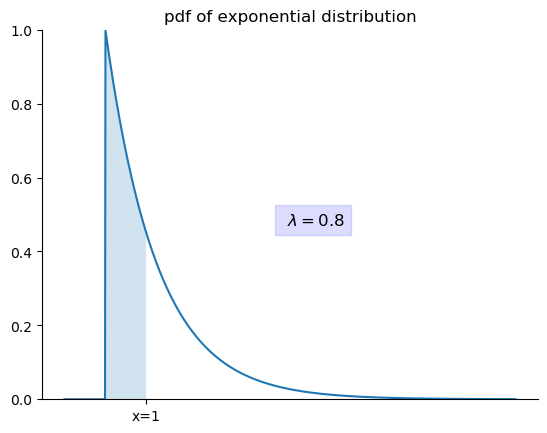

In [167]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider
plt.rcParams['figure.figsize'] = (12, 8)
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
lmbd = 0.8
x=1

xdata = np.linspace(-1, 10, 1000)
def pdf_func(xdata):
    f1 = lambda y: np.exp(-lmbd *(y + np.abs(y))/2)
    val = np.piecewise(xdata, [xdata<0, xdata>=0], [0, f1])
    return val


plt.plot(xdata, pdf_func(xdata))
xshade = xdata[xdata<=x]
plt.fill_between(xshade, pdf_func(xshade), alpha=0.2)
plt.xticks([x],["x={}".format(x)])
plt.ylim(0, 1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.figtext(0.5,0.5, r" $\lambda=${}".format(lmbd), ha="left", va="top",
            backgroundcolor=(0.1, 0.1, 1, 0.15), fontsize="large")
plt.title("pdf of exponential distribution")

plt.show();
    


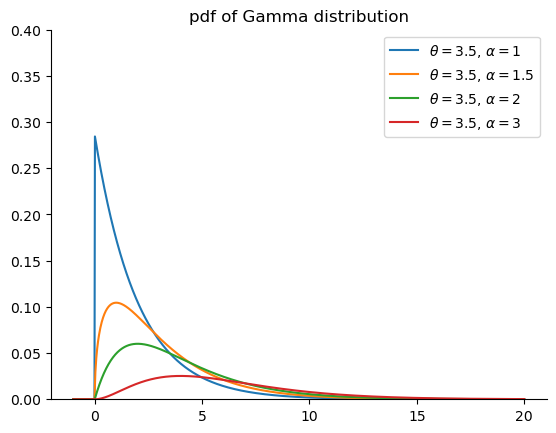

In [148]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma 
from ipywidgets import interact, FloatSlider
plt.rcParams['figure.figsize'] = (12, 8)
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

Alpha = [1, 1.5,  2, 3]
Theta = [3.5, 3.5, 3.5, 3.5 ]

def pdf_func(xdata, alpha, theta):
    f1 = lambda y: np.power(y, alpha-1)*np.exp(-y/2)/(np.power(theta,alpha)*gamma(alpha))
    val = np.piecewise(xdata, [xdata<0, xdata>=0], [0, f1])
    return val

fix, ax = plt.subplots()

def pplot_gamma(theta, alpha, ax):
    xdata = np.linspace(-1, 20, 1000)
    ax.plot(xdata, pdf_func(xdata, alpha, theta), label=r"$\theta=${}, $\alpha=${}".format(theta, alpha))
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.set_ylim(0, 0.4) 
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)

for t,a in zip(Theta, Alpha):
    pplot_gamma(t, a, ax)
  
ax.set_title("pdf of Gamma distribution")
plt.legend()  
plt.show();


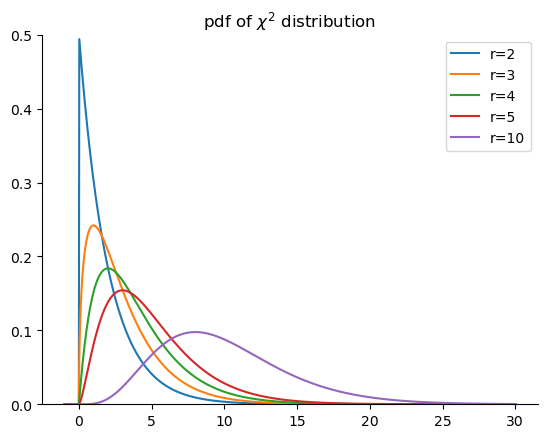

In [151]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma 
from ipywidgets import interact, FloatSlider
plt.rcParams['figure.figsize'] = (12, 8)
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

r_values = [2, 3, 4, 5, 10]

def pdf_func(xdata, alpha, theta):
    f1 = lambda y: np.power(y, alpha-1)*np.exp(-y/2)/(np.power(theta,alpha)*gamma(alpha))
    val = np.piecewise(xdata, [xdata<0, xdata>=0], [0, f1])
    return val

fix, ax = plt.subplots()

def pplot_chi(r):
    alpha = r/2
    xdata = np.linspace(-1, 30, 1000)
    ax.plot(xdata, pdf_func(xdata, alpha, theta=2), label="r={}".format(r))
    ax.set_ylim(0, 0.5) 
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)

for r in r_values:
    pplot_chi(r)
  
ax.set_title(r"pdf of $\chi^2$ distribution")
plt.legend()  
plt.show();

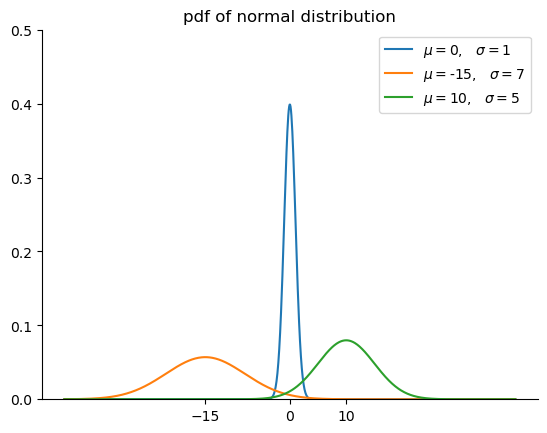

In [152]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma 
from ipywidgets import interact, FloatSlider
plt.rcParams['figure.figsize'] = (12, 8)
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

Mu = [0,  -15, 10]
Sigma = [1, 7, 5 ]

def pdf_func(xdata, mu, sigma):
    val = np.exp(-np.power(xdata-mu,2)/(2*sigma**2))/(sigma *np.sqrt(2*np.pi))
    return val

fix, ax = plt.subplots()

def pplot_gamma(mu, sigma, ax):
    xdata = np.linspace(-40, 40, 1000)
    ax.plot(xdata, pdf_func(xdata, mu, sigma), label=r"$\mu=${},   $\sigma=${}".format(mu, sigma))
    ax.set_ylim(0, 0.5) 
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)

for mu,sigma in zip(Mu, Sigma):
    pplot_gamma(mu, sigma, ax)
  
ax.set_title("pdf of normal distribution")
plt.xticks(Mu)
plt.legend()  
plt.show();


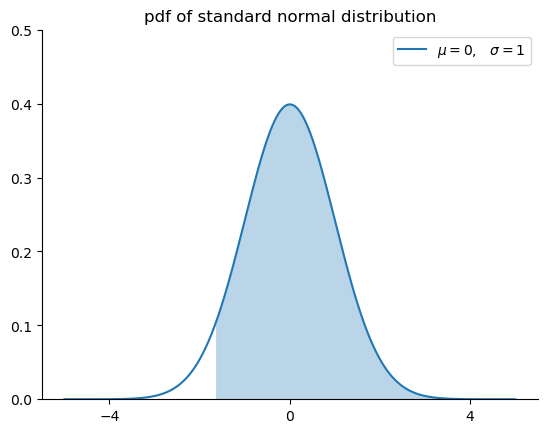

In [153]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma 
from ipywidgets import interact, FloatSlider
plt.rcParams['figure.figsize'] = (12, 8)
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

mu=0
sigma =1
alpha = 0.05
z  = 1.645

def pdf_func(xdata, mu, sigma):
    val = np.exp(-np.power(xdata-mu,2)/(2*sigma**2))/(sigma *np.sqrt(2*np.pi))
    return val

fix, ax = plt.subplots()

def pplot_gamma(mu, sigma, ax, z):
    xdata = np.linspace(-5, 5, 1000)
    xshade = xdata[xdata-mu/sigma>=-z]
    ax.fill_between(xshade, pdf_func(xshade, mu, sigma), alpha=0.3 )
    #xshade = xdata[xdata-mu/sigma<=-z]
    #ax.fill_between(xshade, pdf_func(xshade, mu, sigma), alpha=0.3, color="blue")
    ax.plot(xdata, pdf_func(xdata, mu, sigma), label=r"$\mu=${},   $\sigma=${}".format(mu, sigma))
    ax.set_ylim(0, 0.5) 
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    
pplot_gamma(mu, sigma, ax, z)
  
ax.set_title("pdf of standard normal distribution")
plt.xticks([-4,0,4])
plt.legend()  
plt.show();


In [2]:
# # nbi:hide_in


##### These are for the homeworkproblems #####


# import matplotlib.pyplot as plt
# import numpy as np
# from ipywidgets import interact, FloatSlider
# plt.rcParams['figure.figsize'] = (12, 8)
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)
# lmbd = 0.8
# x=1

# xdata = np.linspace(-1, 10, 1000)
# def pdf_func(xdata):
#     f1 = lambda y: np.exp(-lmbd *(y + np.abs(y))/2)
#     val = np.piecewise(xdata, [xdata<0, xdata>=0], [0, f1])
#     return val


# plt.plot(xdata, pdf_func(xdata))
# xshade = xdata[xdata<=x]
# plt.fill_between(xshade, pdf_func(xshade), alpha=0.2)
# plt.xticks([x],["x={}".format(x)])
# plt.axhline(y=0, color='k', linewidth=0.5)
# plt.box(on=None)
# plt.figtext(0.5,0.5, r" $\lambda=${}".format(lmbd), ha="left", va="top",
#             backgroundcolor=(0.1, 0.1, 1, 0.15), fontsize="large")
# plt.show();
    


In [3]:
# # nbi:hide_in
# import matplotlib.pyplot as plt
# import numpy as np
# from ipywidgets import interact, FloatSlider
# plt.rcParams['figure.figsize'] = (12, 8)
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)
# lmbd = 0.8
# x=1

# xdata = np.linspace(-1, 3, 1000)
# def pdf_func(xdata):
#     f1 = lambda y: np.power(y,4)/16
#     val = np.piecewise(xdata, [xdata<0, (xdata>=0) & (xdata<=2), xdata>=2], [0, f1, 1])
#     return val


# plt.plot(xdata, pdf_func(xdata))
# xshade = xdata[xdata<=x]
# plt.axhline(y=0, color='k', linewidth=0.5)
# plt.title("cdf")
# plt.show();
    


In [4]:
# # nbi:hide_in
# import matplotlib.pyplot as plt
# import numpy as np
# from ipywidgets import interact, FloatSlider
# plt.rcParams['figure.figsize'] = (12, 8)
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)
# lmbd = 0.8
# x=1

# xdata = np.linspace(-1, 3, 1000)
# def pdf_func(xdata):
#     f1 = lambda y: np.power(y,3)/4
#     val = np.piecewise(xdata, [xdata<0, (xdata>=0) & (xdata<=2), xdata>=2], [0, f1, 0])
#     return val


# plt.plot(xdata, pdf_func(xdata))
# xshade = xdata[xdata<=x]
# plt.axhline(y=0, color='k', linewidth=0.5)
# plt.title("pdf")
# plt.show();
    


In [5]:
# # nbi:hide_in
# import matplotlib.pyplot as plt
# import numpy as np
# from ipywidgets import interact, FloatSlider
# plt.rcParams['figure.figsize'] = (12, 8)
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)



# xdata = np.linspace(-3,3, 1000)
# def pdf_func(xdata):
#     f1 = lambda y: np.power(y,3)/16+0.5
#     val = np.piecewise(xdata, [xdata<-2, (xdata>=-2) & (xdata<=2), xdata>=2], [0, f1, 1])
#     return val


# plt.plot(xdata, pdf_func(xdata))
# xshade = xdata[xdata<=x]
# plt.axhline(y=0, color='k', linewidth=0.5)
# plt.title("cdf")
# plt.show();

In [6]:
# # nbi:hide_in
# import matplotlib.pyplot as plt
# import numpy as np
# from ipywidgets import interact, FloatSlider
# plt.rcParams['figure.figsize'] = (12, 8)
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)
# lmbd = 0.8
# x=1

# xdata = np.linspace(-3, 3, 1000)
# def pdf_func(xdata):
#     f1 = lambda y: np.power(y,2)/16
#     val = np.piecewise(xdata, [xdata<-2, (xdata>=-2) & (xdata<=2), xdata>=2], [0, f1, 0])
#     return val


# plt.plot(xdata, pdf_func(xdata))
# xshade = xdata[xdata<=x]
# plt.axhline(y=0, color='k', linewidth=0.5)
# plt.title("pdf")
# plt.show();
    

In [7]:
# # nbi:hide_in
# import matplotlib.pyplot as plt
# import numpy as np
# from ipywidgets import interact, FloatSlider
# plt.rcParams['figure.figsize'] = (12, 8)
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)
# lmbd = 0.8
# x=1

# xdata = np.linspace(-1, 2, 1001)
# def pdf_func(xdata):
#     f1 = lambda y: np.power(y,0.5)
#     val = np.piecewise(xdata, [xdata<0, (xdata>=0) & (xdata<=1), xdata>=1], [0, f1, 1])
#     return val


# plt.plot(xdata, pdf_func(xdata))
# xshade = xdata[xdata<=x]
# plt.axhline(y=0, color='k', linewidth=0.5)
# plt.title("cdf")
# plt.show();
    

In [8]:
# # nbi:hide_in
# import matplotlib.pyplot as plt
# import numpy as np
# from ipywidgets import interact, FloatSlider
# plt.rcParams['figure.figsize'] = (12, 8)
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)
# lmbd = 0.8
# x=1

# xdata = np.linspace(-1, 2, 1001)
# def pdf_func(xdata):
#     f1 = lambda y: np.reciprocal(np.power(y,0.5))/2
#     val = np.piecewise(xdata, [xdata<0, (xdata>=0) & (xdata<=1), xdata>=1], [0, f1, 0])
#     return val


# plt.plot(xdata, pdf_func(xdata))
# xshade = xdata[xdata<=x]
# plt.axhline(y=0, color='k', linewidth=0.5)
# plt.title("pdf")
# plt.show();

In [10]:
# # nbi:hide_in
# import matplotlib.pyplot as plt
# import numpy as np
# from ipywidgets import interact, FloatSlider
# plt.rcParams['figure.figsize'] = (12, 8)
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)
# lmbd = 0.8
# x=1

# xdata = np.linspace(-1, 3, 1001)
# def cdf_func(xdata):
#     f1 = lambda y: np.power(y,2)/4
#     f2 = lambda y: (y+1)/4
#     val = np.piecewise(xdata, [xdata<0, (xdata>=0) & (xdata<1),(xdata>=1) & (xdata<2), xdata>=2], [0, f1, f2, 1])
#     return val


# plt.plot(xdata, cdf_func(xdata))
# xshade = xdata[xdata<=x]
# plt.axhline(y=0, color='k', linewidth=0.5)
# plt.title("cdf")
# plt.show();

## Mixture distribution

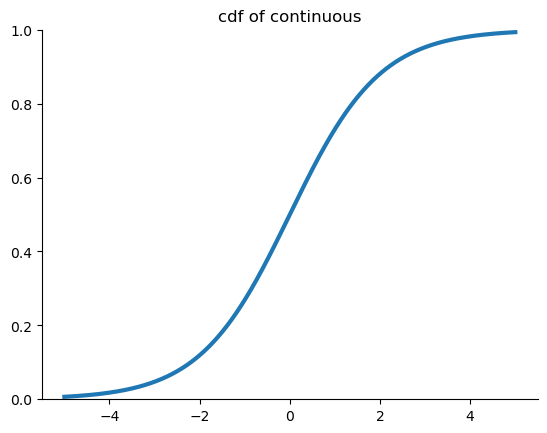

In [129]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider
plt.rcParams['figure.figsize'] = (12, 8)
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
lmbd = 0.8
x=1

xdata = np.linspace(-5, 5, 1001)
def cdf_func1(xdata):
    f = lambda y: np.exp(y)/(1+np.exp(y))
    return f(xdata)

def cdf_func2(xdata):
    val = np.piecewise(xdata, [xdata<0, xdata>=0], [0, 1])
    return val

plt.plot(xdata, cdf_func1(xdata), linewidth=3)
xshade = xdata[xdata<=x]
plt.ylim(0, 1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("cdf of continuous")
plt.show();

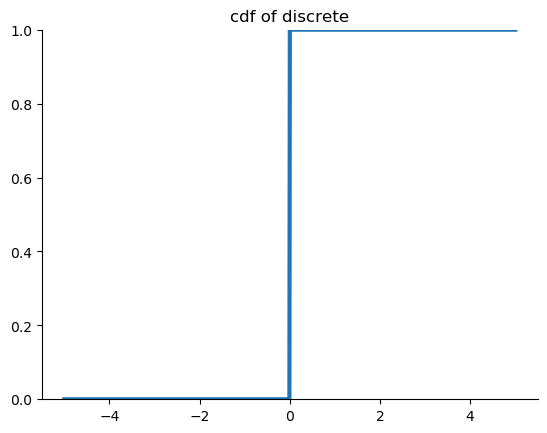

In [126]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider
plt.rcParams['figure.figsize'] = (12, 8)
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
lmbd = 0.8
x=1

xdata = np.linspace(-5, 5, 1001)
def cdf_func1(xdata):
    f = lambda y: np.exp(y)/(1+np.exp(y))
    return f(xdata)

def cdf_func2(xdata):
    val = np.piecewise(xdata, [xdata<0, xdata>=0], [0, 1])
    return val

plt.plot(xdata,  cdf_func2(xdata), linewidth=3)
xshade = xdata[xdata<=x]
plt.ylim(0, 1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("cdf of discrete")
plt.show();

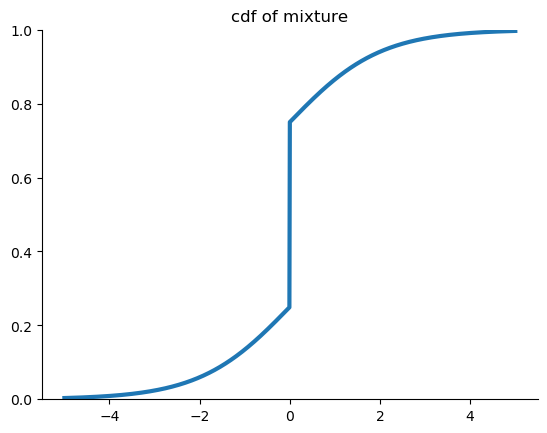

In [125]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider
plt.rcParams['figure.figsize'] = (12, 8)
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
lmbd = 0.8
x=1

xdata = np.linspace(-5, 5, 1001)
def cdf_func1(xdata):
    f = lambda y: np.exp(y)/(1+np.exp(y))
    return f(xdata)

def cdf_func2(xdata):
    val = np.piecewise(xdata, [xdata<0, xdata>=0], [0, 1])
    return val

plt.plot(xdata, cdf_func1(xdata)/2+cdf_func2(xdata)/2, linewidth=3)
xshade = xdata[xdata<=x]
plt.ylim(0, 1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("cdf of mixture")
plt.show();

## Density histogram

[1.31868132 0.87912088 1.0989011  0.98901099]


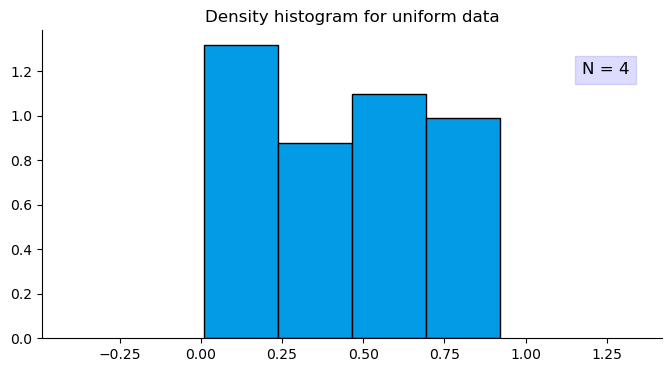

In [136]:
# nbi:hide_in
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 4)

n=40 #max number of samples
a=0
b=1

#data =np.round(np.random.rand(n)*(b-a)+a, 4)

def epmf(data, inter, N):
    epmf_values = np.zeros(N)
    for i in range(N): 
        length = inter[i+1]-inter[i]
        epmf_values[i] = np.sum((inter[i]<=data) & (data<inter[i+1]))/(data.size*length)
    print(epmf_values)
    return epmf_values 
    
def dens_hist_std(data, N=10):
    zmax = np.round(np.max(data), 2)
    zmin = np.round(np.min(data), 2)
    inter = np.linspace(zmin,zmax,N+1)   
    length = inter[1]-inter[0]
    epmf_values = epmf(data, inter, N)
    
    plt.bar(inter[:N], epmf_values, width=length, 
            color='#039be5', edgecolor='black', linewidth=1, 
            align="edge", label="True histogran")
    plt.figtext(0.8,0.8, "N = {}".format(N), ha="left", va="top",
        backgroundcolor=(0.1, 0.1, 1, 0.15), fontsize="large")
    plt.xlim(zmin-0.5, zmax+0.5)
    plt.title("Density histogram for uniform data")
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
 
dens_hist_std(data, 4)

plt.show();
